In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#from feature_engine.selection import SmartCorrelatedSelection
from NETCORE import *
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("raw_dataset/HEA_dataset.csv")
print(f"Shape of the HEA Dataset: {df.shape}")
df.head()

Shape of the HEA Dataset: (1167, 51)


Alloy Phase  range_MendeleevNumber  mode_MendeleevNumber  \
0   Al0.5NbTaTiV   BCC                     30                    43   
1  Al0.75MoNbTiV   BCC                     30                    43   
2  Al0.25MoNbTiV   BCC                     30                    43   
3  Al0.25NbTaTiV   BCC                     30                    43   
4   Al0.2MoTaTiV   BCC                     30                    43   

   avg_dev_AtomicWeight  minimum_MeltingT  maximum_MeltingT  avg_dev_MeltingT  \
0             45.435764            933.47            3290.0        584.546173   
1             24.934581            933.47            2896.0        521.067701   
2             23.677961            933.47            2896.0        441.662561   
3             44.851412            933.47            3290.0        539.821730   
4             45.440785            933.47            3290.0        565.511565   

   mode_MeltingT  maximum_Column  ...  mode_NUnfilled  minimum_GSvolume_pa  \
0         1941.0              13  ...               7                13.01   
1         1941.0              13  ...               6                13.01   
2         1941.0              13  ...               6                13.01   
3         1941.0              13  ...               7                13.01   
4         1941.0              13  ...               6                13.01   

   range_GSvolume_pa  mode_GSvolume_pa  maximum_GSbandgap  avg_dev_GSbandgap  \
0               5.17             13.01                0.0                0.0   
1               5.17             13.01                0.0                0.0   
2               5.17             13.01                0.0                0.0   
3               5.17             13.01                0.0                0.0   
4               5.11             13.01                0.0                0.0   

   range_GSmagmom  minimum_SpaceGroupNumber  maximum_SpaceGroupNumber  \
0        0.000023                       194                       229   
1        0.000023                       194                       229   
2        0.000023                       194                       229   
3        0.000023                       194                       229   
4        0.000023                       194                       229   

   mean_SpaceGroupNumber  
0             220.777778  
1             221.000000  
2             220.529412  
3             220.529412  
4             220.476191  

[5 rows x 51 columns]

In [3]:
df.describe(include='all').T

count unique              top freq         mean  \
Alloy                        1167   1162  AlCoCrCu0.5FeNi    2          NaN   
Phase                        1167      4              MIP  428          NaN   
range_MendeleevNumber      1167.0    NaN              NaN  NaN    21.652956   
mode_MendeleevNumber       1167.0    NaN              NaN  NaN      50.8012   
avg_dev_AtomicWeight       1167.0    NaN              NaN  NaN    13.697445   
minimum_MeltingT           1167.0    NaN              NaN  NaN  1244.782656   
maximum_MeltingT           1167.0    NaN              NaN  NaN  2488.686298   
avg_dev_MeltingT           1167.0    NaN              NaN  NaN   287.263286   
mode_MeltingT              1167.0    NaN              NaN  NaN  1548.963102   
maximum_Column             1167.0    NaN              NaN  NaN    11.351328   
range_Column               1167.0    NaN              NaN  NaN     6.321337   
avg_dev_Column             1167.0    NaN              NaN  NaN     1.643744   
mode_Column                1167.0    NaN              NaN  NaN      6.43102   
minimum_Row                1167.0    NaN              NaN  NaN     3.348757   
mean_Row                   1167.0    NaN              NaN  NaN     4.083346   
mode_Row                   1167.0    NaN              NaN  NaN     3.747215   
minimum_CovalentRadius     1167.0    NaN              NaN  NaN   124.757498   
maximum_CovalentRadius     1167.0    NaN              NaN  NaN   154.173093   
range_CovalentRadius       1167.0    NaN              NaN  NaN    29.415596   
avg_dev_CovalentRadius     1167.0    NaN              NaN  NaN     7.472816   
mode_CovalentRadius        1167.0    NaN              NaN  NaN    131.14653   
maximum_Electronegativity  1167.0    NaN              NaN  NaN     1.958149   
mean_Electronegativity     1167.0    NaN              NaN  NaN     1.729435   
mode_Electronegativity     1167.0    NaN              NaN  NaN     1.603248   
mean_NsValence             1167.0    NaN              NaN  NaN     1.752469   
maximum_NpValence          1167.0    NaN              NaN  NaN     0.734362   
mean_NpValence             1167.0    NaN              NaN  NaN      0.11555   
avg_dev_NpValence          1167.0    NaN              NaN  NaN     0.162414   
maximum_NdValence          1167.0    NaN              NaN  NaN     7.749786   
range_NdValence            1167.0    NaN              NaN  NaN     6.508997   
mean_NdValence             1167.0    NaN              NaN  NaN      4.89686   
avg_dev_NdValence          1167.0    NaN              NaN  NaN     1.650917   
avg_dev_NValence           1167.0    NaN              NaN  NaN      2.23627   
mode_NValence              1167.0    NaN              NaN  NaN     5.185947   
maximum_NpUnfilled         1167.0    NaN              NaN  NaN     3.053985   
maximum_NdUnfilled         1167.0    NaN              NaN  NaN     6.219366   
range_NdUnfilled           1167.0    NaN              NaN  NaN     5.023993   
avg_dev_NdUnfilled         1167.0    NaN              NaN  NaN     1.396415   
minimum_NUnfilled          1167.0    NaN              NaN  NaN     2.562982   
range_NUnfilled            1167.0    NaN              NaN  NaN     4.237361   
avg_dev_NUnfilled          1167.0    NaN              NaN  NaN     1.245047   
mode_NUnfilled             1167.0    NaN              NaN  NaN     3.484147   
minimum_GSvolume_pa        1167.0    NaN              NaN  NaN    11.079624   
range_GSvolume_pa          1167.0    NaN              NaN  NaN     7.307341   
mode_GSvolume_pa           1167.0    NaN              NaN  NaN    12.126617   
maximum_GSbandgap          1167.0    NaN              NaN  NaN     0.183337   
avg_dev_GSbandgap          1167.0    NaN              NaN  NaN     0.017367   
range_GSmagmom             1167.0    NaN              NaN  NaN     1.511758   
minimum_SpaceGroupNumber   1167.0    NaN              NaN  NaN   195.450728   
maximum_SpaceGroupNumber   1167.0    NaN              NaN  NaN   228.912596   

In [4]:
phase_count = dict(df.Phase.value_counts(ascending=False))
phase_count

{'MIP': 428, 'BCC': 363, 'FCC': 211, 'FCC_BCC': 165}

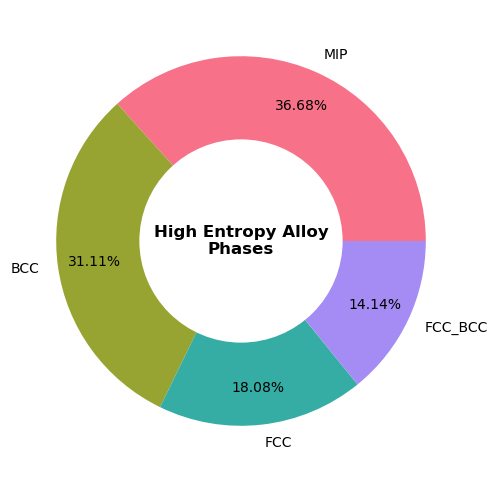

In [5]:
# PLOT PIE CHART
labels = list(phase_count.keys())
values = list(phase_count.values())

# Set the color palette
colors = sns.color_palette("husl", len(labels))

# Create the donut plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Draw the pie chart
_, text, autotext = ax.pie(values, labels=labels, autopct='%.2f%%', colors=colors, pctdistance=0.8)
for t in text+autotext:
    t.set_fontsize(10)
    
# Add a central circle to create the donut shape
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
centre_text = plt.text(0, 0, "High Entropy Alloy\nPhases", horizontalalignment='center', verticalalignment='center', 
                      fontsize=12, fontweight='bold')
fig.gca().add_artist(centre_circle)
plt.show()
#fig.savefig("figures/pie_chart.png", bbox_inches='tight', dpi=600)

In [6]:
X = df.copy().drop(columns=["Alloy", "Phase"])
y = df["Phase"].astype("category")
print("Shape of features: ", X.shape)
print("Shape of target: ", y.shape)

Shape of features:  (1167, 49)
Shape of target:  (1167,)


In [7]:
X.head()

range_MendeleevNumber  mode_MendeleevNumber  avg_dev_AtomicWeight  \
0                     30                    43             45.435764   
1                     30                    43             24.934581   
2                     30                    43             23.677961   
3                     30                    43             44.851412   
4                     30                    43             45.440785   

   minimum_MeltingT  maximum_MeltingT  avg_dev_MeltingT  mode_MeltingT  \
0            933.47            3290.0        584.546173         1941.0   
1            933.47            2896.0        521.067701         1941.0   
2            933.47            2896.0        441.662561         1941.0   
3            933.47            3290.0        539.821730         1941.0   
4            933.47            3290.0        565.511565         1941.0   

   maximum_Column  range_Column  avg_dev_Column  ...  mode_NUnfilled  \
0              13             9        1.629630  ...               7   
1              13             9        2.127424  ...               6   
2              13             9        1.134948  ...               6   
3              13             9        0.913495  ...               7   
4              13             9        1.020408  ...               6   

   minimum_GSvolume_pa  range_GSvolume_pa  mode_GSvolume_pa  \
0                13.01               5.17             13.01   
1                13.01               5.17             13.01   
2                13.01               5.17             13.01   
3                13.01               5.17             13.01   
4                13.01               5.11             13.01   

   maximum_GSbandgap  avg_dev_GSbandgap  range_GSmagmom  \
0                0.0                0.0        0.000023   
1                0.0                0.0        0.000023   
2                0.0                0.0        0.000023   
3                0.0                0.0        0.000023   
4                0.0                0.0        0.000023   

   minimum_SpaceGroupNumber  maximum_SpaceGroupNumber  mean_SpaceGroupNumber  
0                       194                       229             220.777778  
1                       194                       229             221.000000  
2                       194                       229             220.529412  
3                       194                       229             220.529412  
4                       194                       229             220.476191  

[5 rows x 49 columns]

In [8]:
# CHECKING CORRELATION AMONG FEATURES
X.corr().style.background_gradient(cmap='viridis')

In [9]:
reduced_feats = run_NETCORE(X, 0.85)
X_NETCORE = X[reduced_feats]
X_NETCORE.corr().style.background_gradient('viridis')

final reduced feature vector: ['avg_dev_AtomicWeight', 'maximum_MeltingT', 'avg_dev_MeltingT', 'mode_MeltingT', 'avg_dev_Column', 'mean_Row', 'mode_Row', 'minimum_CovalentRadius', 'maximum_CovalentRadius', 'range_CovalentRadius', 'avg_dev_CovalentRadius', 'mode_CovalentRadius', 'maximum_Electronegativity', 'mean_Electronegativity', 'mode_Electronegativity', 'mean_NsValence', 'maximum_NpValence', 'mean_NpValence', 'avg_dev_NpValence', 'range_NdValence', 'mean_NdValence', 'avg_dev_NdValence', 'avg_dev_NValence', 'mode_NValence', 'maximum_NdUnfilled', 'range_NdUnfilled', 'avg_dev_NdUnfilled', 'mode_NUnfilled', 'minimum_GSvolume_pa', 'range_GSvolume_pa', 'mode_GSvolume_pa', 'maximum_GSbandgap', 'avg_dev_GSbandgap', 'range_GSmagmom', 'minimum_SpaceGroupNumber', 'maximum_SpaceGroupNumber', 'mean_SpaceGroupNumber', 'range_Column', 'maximum_NpUnfilled', 'maximum_NdValence', 'mode_MendeleevNumber', 'range_NUnfilled']
length of the final reduced feature vector: 42 (from initially 49)


In [10]:
print("After droping highly correlated feature using NETCORE algorithm\nShape of feature set: ", X_NETCORE.shape)

After droping highly correlated feature using NETCORE algorithm
Shape of feature set:  (1167, 42)


In [11]:
df_NETCORE = pd.concat([df["Alloy"], X_NETCORE, y], axis=1)
df_NETCORE.head()

Alloy  avg_dev_AtomicWeight  maximum_MeltingT  avg_dev_MeltingT  \
0   Al0.5NbTaTiV             45.435764            3290.0        584.546173   
1  Al0.75MoNbTiV             24.934581            2896.0        521.067701   
2  Al0.25MoNbTiV             23.677961            2896.0        441.662561   
3  Al0.25NbTaTiV             44.851412            3290.0        539.821730   
4   Al0.2MoTaTiV             45.440785            3290.0        565.511565   

   mode_MeltingT  avg_dev_Column  mean_Row  mode_Row  minimum_CovalentRadius  \
0         1941.0        1.629630  4.555556         4                     121   
1         1941.0        2.127424  4.263158         4                     121   
2         1941.0        1.134948  4.411765         4                     121   
3         1941.0        0.913495  4.647059         4                     121   
4         1941.0        1.020408  4.666667         4                     121   

   maximum_CovalentRadius  ...  range_GSmagmom  minimum_SpaceGroupNumber  \
0                     170  ...        0.000023                       194   
1                     164  ...        0.000023                       194   
2                     164  ...        0.000023                       194   
3                     170  ...        0.000023                       194   
4                     170  ...        0.000023                       194   

   maximum_SpaceGroupNumber  mean_SpaceGroupNumber  range_Column  \
0                       229             220.777778             9   
1                       229             221.000000             9   
2                       229             220.529412             9   
3                       229             220.529412             9   
4                       229             220.476191             9   

   maximum_NpUnfilled  maximum_NdValence  mode_MendeleevNumber  \
0                   5                  4                    43   
1                   5                  5                    43   
2                   5                  5                    43   
3                   5                  4                    43   
4                   5                  5                    43   

   range_NUnfilled  Phase  
0                3    BCC  
1                3    BCC  
2                3    BCC  
3                3    BCC  
4                3    BCC  

[5 rows x 44 columns]

In [12]:
df_NETCORE.to_csv("raw_dataset/HEA_NETCORE.csv", index=False)

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# log1p transformation
data = X_NETCORE.copy()
data_log1p = data.apply(np.log1p, axis=1)

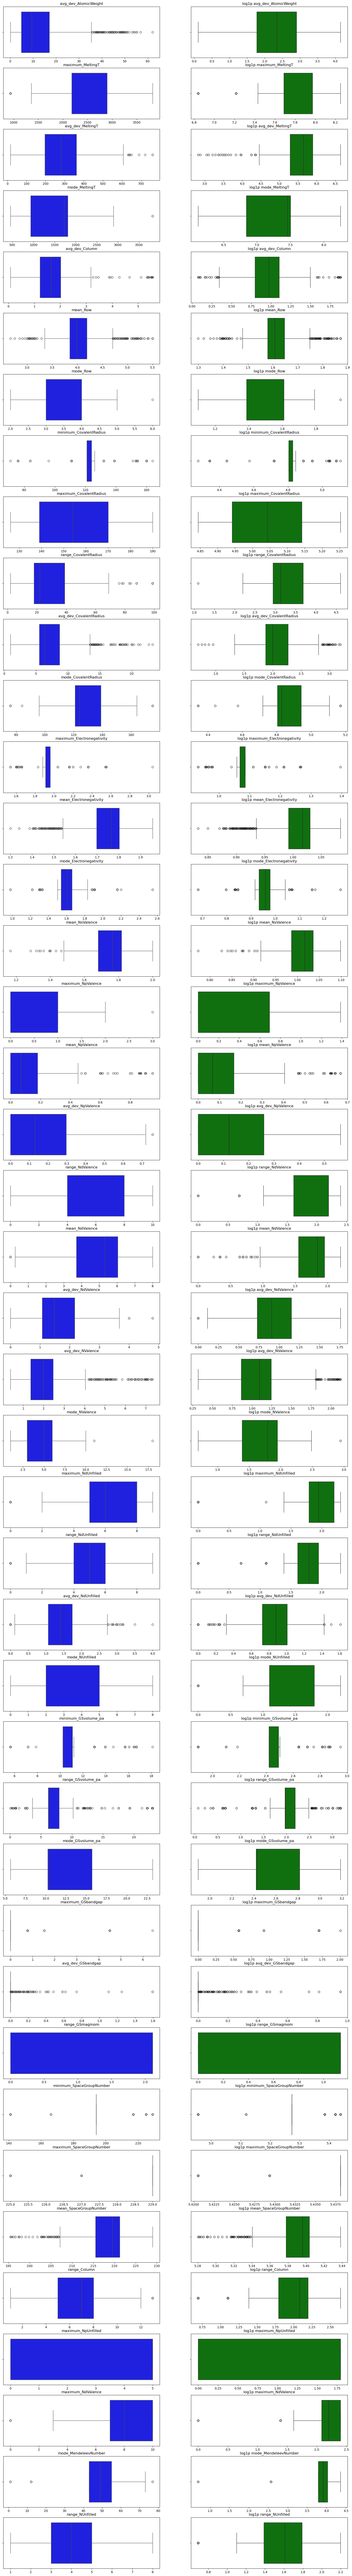

In [15]:
# BOX PLOT TO CHECK OUTLIER
COLS = X_NETCORE.shape[1]
fig, axes = plt.subplots(COLS, 2, figsize=(20, 150))
axes = axes.flatten()

for i, c in enumerate(data.columns):
    # original
    sns.boxplot(data[c], color='blue', orient='h', ax=axes[2*i])
    axes[2*i].set_title(f"{c}")
    axes[2*i].set_xlabel("")
    # log1p
    sns.boxplot(data_log1p[c], color='green', orient='h', ax=axes[(2*i)+1])
    axes[(2*i)+1].set_title(f"log1p {c}")
    axes[(2*i)+1].set_xlabel("")
    
plt.show()

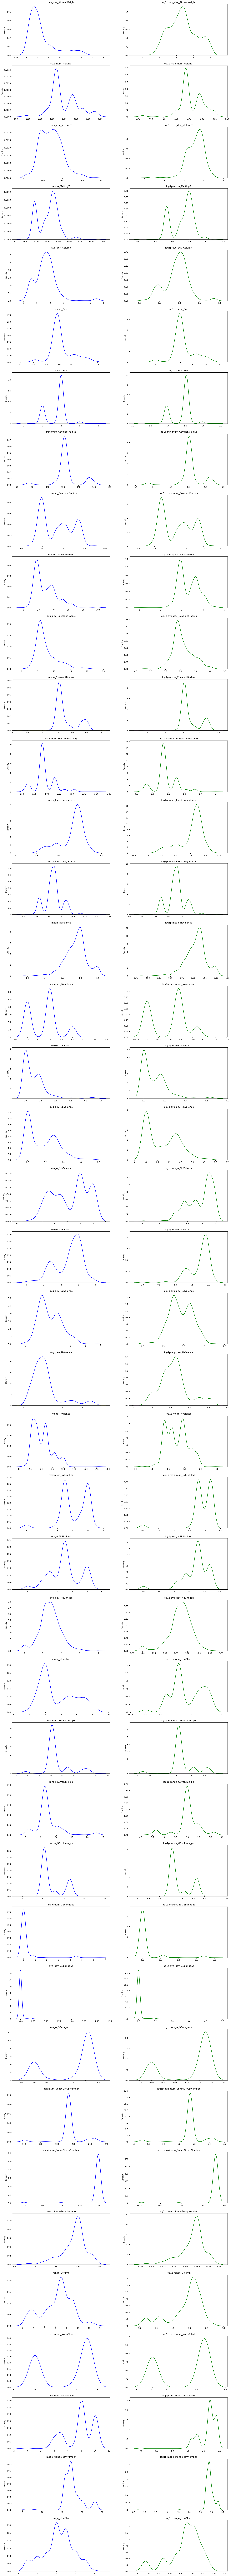

In [16]:
# PLOT DISTRIBUTION PLOT TO CHECK SKEWNESS AND SEE IF LOG1P IMPROVES THE PLOT
fig, axes = plt.subplots(COLS, 2, figsize=(20, 240))
axes = axes.flatten()

for i, c in enumerate(data.columns):
    # PLOT ORIGINAL
    sns.kdeplot(data[c], color='blue', ax=axes[2*i])
    axes[2*i].set_title(f"{c}")
    axes[2*i].set_xlabel("")

    # PLOT LOG1P
    sns.kdeplot(data_log1p[c], color='green', ax=axes[(2*i)+1])
    axes[(2*i)+1].set_title(f"log1p {c}")
    axes[(2*i)+1].set_xlabel("")

plt.show()

In [17]:
# LOG1P TRANSFORMING REQUIRED COLUMNS
cols_to_transform = ['avg_dev_AtomicWeight', 
                     'mode_MeltingT', 
                     'avg_dev_Column',
                     'range_CovalentRadius', 
                     'avg_dev_CovalentRadius', 
                     'mode_Electronegativity',
                     'maximum_NpValence', 
                     'avg_dev_NpValence',
                     'avg_dev_NdValence',
                     'avg_dev_NValence', 
                     'mode_NValence', 
                     'avg_dev_NdUnfilled',
                     'minimum_GSvolume_pa',
                     'range_GSvolume_pa', 
                     'mode_GSvolume_pa']
X_tr = X_NETCORE.copy()
for c in cols_to_transform:
    X_tr[c] = X_tr[c].apply(np.log1p)
X_tr

avg_dev_AtomicWeight  maximum_MeltingT  avg_dev_MeltingT  mode_MeltingT  \
0                 3.838070            3290.0        584.546173       7.571474   
1                 3.255577            2896.0        521.067701       7.571474   
2                 3.205911            2896.0        441.662561       7.571474   
3                 3.825406            3290.0        539.821730       7.571474   
4                 3.838178            3290.0        565.511565       7.571474   
...                    ...               ...               ...            ...   
1162              2.591875            2180.0        281.297959       6.839980   
1163              2.418520            2750.0        337.111111       7.326466   
1164              1.431996            2180.0        157.333333       7.326466   
1165              1.775522            2180.0        173.620000       7.571474   
1166              0.964421            1811.0         76.720000       7.455298   

      avg_dev_Column  mean_Row  mode_Row  minimum_CovalentRadius  \
0           0.966843  4.555556         4                     121   
1           1.140210  4.263158         4                     121   
2           0.758442  4.411765         4                     121   
3           0.648931  4.647059         4                     121   
4           0.703300  4.666667         4                     121   
...              ...       ...       ...                     ...   
1162        1.151605  3.714286         3                     111   
1163        0.916291  4.166667         4                     124   
1164        0.980829  4.000000         4                     124   
1165        1.214125  4.000000         4                     124   
1166        0.712950  4.000000         4                     124   

      maximum_CovalentRadius  range_CovalentRadius  ...  avg_dev_GSbandgap  \
0                        170              3.912023  ...           0.000000   
1                        164              3.784190  ...           0.000000   
2                        164              3.784190  ...           0.000000   
3                        170              3.912023  ...           0.000000   
4                        170              3.912023  ...           0.000000   
...                      ...                   ...  ...                ...   
1162                     139              3.367296  ...           0.189306   
1163                     164              3.713572  ...           0.000000   
1164                     160              3.610918  ...           0.000000   
1165                     160              3.610918  ...           0.000000   
1166                     139              2.772589  ...           0.000000   

      range_GSmagmom  minimum_SpaceGroupNumber  maximum_SpaceGroupNumber  \
0           0.000023                       194                       229   
1           0.000023                       194                       229   
2           0.000023                       194                       229   
3           0.000023                       194                       229   
4           0.000023                       194                       229   
...              ...                       ...                       ...   
1162        2.110663                       194                       229   
1163        2.110663                       194                       229   
1164        2.110663                       194                       229   
1165        2.110663                       194                       229   
1166        2.110353                       194                       229   

      mean_SpaceGroupNumber  range_Column  maximum_NpUnfilled  \
0                220.777778             9                   5   
1                221.000000             9                   5   
2                220.529412             9                   5   
3                220.529412             9                   5   
4                220.476191             9

In [18]:
# Save transformed dataset
df_transformed = pd.concat([df.Alloy, X_tr, y], axis=1)
df_transformed

Alloy  avg_dev_AtomicWeight  maximum_MeltingT  \
0         Al0.5NbTaTiV              3.838070            3290.0   
1        Al0.75MoNbTiV              3.255577            2896.0   
2        Al0.25MoNbTiV              3.205911            2896.0   
3        Al0.25NbTaTiV              3.825406            3290.0   
4         Al0.2MoTaTiV              3.838178            3290.0   
...                ...                   ...               ...   
1162    CuAlNiCoCrFeSi              2.591875            2180.0   
1163      NbCrFeMnCoNi              2.418520            2750.0   
1164      TiCrFeMnCoNi              1.431996            2180.0   
1165     Ti2CrCuFeCoNi              1.775522            2180.0   
1166  Co20Mn20Fe20Ni40              0.964421            1811.0   

      avg_dev_MeltingT  mode_MeltingT  avg_dev_Column  mean_Row  mode_Row  \
0           584.546173       7.571474        0.966843  4.555556         4   
1           521.067701       7.571474        1.140210  4.263158         4   
2           441.662561       7.571474        0.758442  4.411765         4   
3           539.821730       7.571474        0.648931  4.647059         4   
4           565.511565       7.571474        0.703300  4.666667         4   
...                ...            ...             ...       ...       ...   
1162        281.297959       6.839980        1.151605  3.714286         3   
1163        337.111111       7.326466        0.916291  4.166667         4   
1164        157.333333       7.326466        0.980829  4.000000         4   
1165        173.620000       7.571474        1.214125  4.000000         4   
1166         76.720000       7.455298        0.712950  4.000000         4   

      minimum_CovalentRadius  maximum_CovalentRadius  ...  range_GSmagmom  \
0                        121                     170  ...        0.000023   
1                        121                     164  ...        0.000023   
2                        121                     164  ...        0.000023   
3                        121                     170  ...        0.000023   
4                        121                     170  ...        0.000023   
...                      ...                     ...  ...             ...   
1162                     111                     139  ...        2.110663   
1163                     124                     164  ...        2.110663   
1164                     124                     160  ...        2.110663   
1165                     124                     160  ...        2.110663   
1166                     124                     139  ...        2.110353   

      minimum_SpaceGroupNumber  maximum_SpaceGroupNumber  \
0                          194                       229   
1                          194                       229   
2                          194                       229   
3                          194                       229   
4                          194                       229   
...                        ...                       ...   
1162                       194                       229   
1163                       194                       229   
1164                       194                       229   
1165                       194                       229   
1166                       194                       229   

      mean_SpaceGroupNumber  range_Column  maximum_NpUnfilled  \
0                220.777778             9                   5   
1                221.000000             9                   5   
2                220.529412             9                   5   
3                220.529412             9                   5   
4                220.476191             9                   5   
...                     ...           ...                 ...   
1162             222.000000             8                   5   
1163             220.500000             5                   0   
1164             214.666667             6                   0   
116

In [19]:
df_transformed.to_csv("raw_dataset/HEA_tr_NETCORE.csv", index=False)